# Descriptive Statistics Review

### Now that our data has been correclty cleaned, we can proceed to analase all the features

The clarity column is what's called a categorical variable: it means that it represents a qualitative property and therefore can only take a discrete number of possible values. Given that the current values (like VVS2 and SI1) are easily understood let's replace them with a numerical scale, where 0 represent the lowest clarity and 7 the highest.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
pd.set_option('display.max_rows', 10000)

In [3]:
diamonds = pd.read_csv('diamonds1.csv')

In [4]:
clarity = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
for i, j in clarity.items():
    diamonds.clarity.replace(i, j, inplace=True)

In [18]:
color = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
for i, j in color.items():
    diamonds.color.replace(i, j, inplace=True)

Now that we have cleaned our data we can proceed with some exploratory analysis. Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the groupby() method in pandas. 

Here we will ask the students to revisit the overview of the dataset. We will ask the to comment on the measure of variability.
We can see that there is little variation between the variables (since we're dealing with such a small scale this is normal). But we can see that there's a huge variation when we're dealing with the price variable. Thus we can say that even small changes between diamons can affect the price. So we will continue to analyse the rest of the features in order to see which one has a deeper impact on the price.

In [5]:
diamonds.describe()

,carat,clarity,depth,table,price,x,y,z
count,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000
mean,0.797862,3.051122,61.749388,57.457083,3932.017022,5.731974,5.733785,3.539622
std,0.473965,1.647111,1.432488,2.234080,3988.641503,1.119642,1.111494,0.691757
min,0.200000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,61.000000,56.000000,949.250000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,4.000000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,7.000000,79.000000,95.000000,18823.000000,10.740000,10.540000,6.980000


Let's proceed to check each feature separately.

In [19]:
diamonds.groupby('color').mean()

,carat,clarity,depth,table,price,x,y,z
color,,,,,,,,
0,1.162137,2.776353,61.887215,57.812393,5323.818020,6.519338,6.518105,4.033251
1,1.026927,2.964035,61.846385,57.577278,5091.874954,6.222826,6.222730,3.846368
2,0.911496,2.934104,61.836911,57.518239,4484.028189,5.984522,5.979882,3.698622
3,0.771088,3.463419,61.757449,57.288060,3998.145173,5.678549,5.681198,3.507966
4,0.736509,3.134605,61.694087,57.433148,3725.091938,5.616727,5.620529,3.465938
5,0.657882,2.969784,61.662076,57.491456,3076.854737,5.411607,5.416336,3.337585
6,0.657715,2.691025,61.698066,57.404355,3168.106436,5.417851,5.421928,3.343320


From this overview, we can quickly see that the cheapest diamonds would be the ones with color D and the most expensive diamonds would be the ones with color J. This is somewhat weird, since the codebook told us that the classification was from J (worst) to D (best). So from here, we cannot say that the color determines the price of a diamond, we need to look at other features. We also see that depending on the color, the diamonds have different sizes and weights, and that the worst colors have the highest carat and dimensions.

Let's plot the frequency distribution of the diamonds color in our dataset. Remember that you can use the pandas plot() method.

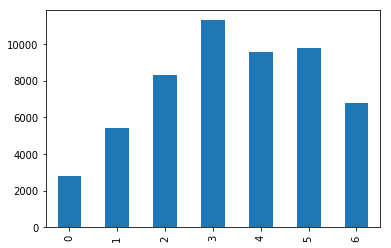

In [24]:
diamonds.color.value_counts().sort_index().plot(kind='bar')

We can see that the most common diamonds are the ones in the middle to top of the color category and the diamonds that are on the low color category are not that abundant.

 Let's check the carat (weight), since this could also be a potential factor for price change.

In [8]:
diamonds.groupby('carat').mean()

,clarity,depth,table,price,x,y,z
carat,,,,,,,
0.20,2.833333,61.100000,59.333333,365.166667,3.786667,3.753333,2.303333
0.21,2.666667,60.511111,58.444444,380.222222,3.874444,3.837778,2.332222
0.22,2.600000,61.620000,60.400000,391.400000,3.898000,3.848000,2.386000
0.23,4.901024,61.426621,58.034130,486.143345,3.946382,3.973379,2.431468
0.24,4.972441,61.599213,57.488189,505.185039,3.990157,4.019331,2.465591
0.25,4.853774,61.565566,57.363208,550.924528,4.062500,4.086934,2.506934
0.26,4.723320,61.677470,56.911858,550.897233,4.102688,4.124704,2.536364
0.27,4.729614,61.599142,56.778970,574.759657,4.159142,4.181588,2.567897
0.28,4.727273,61.526263,56.863636,580.121212,4.207172,4.233687,2.595707


Since we have so many different weights for each diamond (273), we can't clearly get a detailed insight from this DataFrame, but one thing that we can clearly see is that when the weight (carat) increases so does the price and, obviously, the dimensions of the diamonds. Let's plot a histogram to check where do most of our values fall.

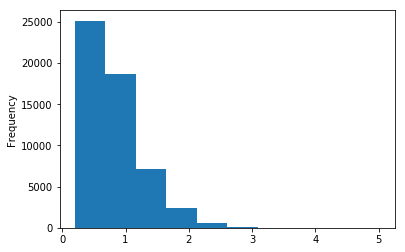

In [17]:
diamonds.carat.plot(kind='hist')

Most of our values fall on the left of our distribution, within 0 and 2. After 2, we have little values for 3, 4 and 5. The heaviest diamonds only have 1 observation in our DataFrame, this means that we don't have that many 'big' diamonds. If you check with the describe method again you will see that the mean value for carat is around 0.8 and this histogram shows you exactly that in a graphic way. This also shows us that the hevy diamonds are rare and the light diamonds are common in our dataset.

In [10]:
diamonds.groupby('table').mean()

,carat,clarity,depth,price,x,y,z
table,,,,,,,
43.0,1.040000,4.000000,62.900000,4997.000000,6.450000,6.410000,4.040000
44.0,0.290000,4.000000,62.800000,474.000000,4.200000,4.240000,2.650000
49.0,0.650000,3.000000,64.250000,2290.500000,5.355000,5.320000,3.425000
50.0,1.510000,2.000000,61.500000,8995.500000,7.380000,7.295000,4.510000
50.1,0.940000,1.000000,66.000000,3353.000000,6.130000,6.170000,4.060000
51.0,0.883333,2.666667,63.300000,4063.666667,5.995556,5.941111,3.780000
51.6,2.000000,4.000000,61.000000,13203.000000,8.140000,8.180000,4.970000
52.0,0.871071,2.892857,62.833929,4342.000000,5.877143,5.870179,3.696429
52.4,0.500000,4.000000,62.500000,1679.000000,5.070000,5.110000,3.180000


Surprisingly we don't see that an increment in table is connected to an increment in price, or even dimensions (which is weird), with the exception of the last table value, which has the biggest mean dimensions. Since we cannot get a clear insight from this feature, we will continue to analize clarity.

In [27]:
diamonds.groupby('clarity').mean()

,carat,color,depth,table,price,x,y,z
clarity,,,,,,,,
0,1.283846,2.968961,62.734278,58.303779,3924.168691,6.761093,6.709379,4.224683
1,1.077501,3.470127,61.771879,57.926923,5061.489498,6.403973,6.394177,3.952195
2,0.850482,3.448450,61.853042,57.662541,3996.001148,5.888383,5.888256,3.640636
3,0.763850,3.494370,61.724249,57.418040,3924.166204,5.658633,5.659782,3.492788
4,0.727134,3.161586,61.667952,57.314249,3839.360264,5.572912,5.579302,3.437718
5,0.596202,3.569483,61.663778,57.024990,3283.737071,5.218454,5.232118,3.221465
6,0.503131,3.350848,61.624521,56.883881,2519.512315,4.961721,4.976437,3.062132
7,0.505123,3.101676,61.510615,56.507207,2864.839106,4.968402,4.989827,3.061659


Strangely, the worst clarities have the highest mean price, this could be related to them having the biggest dimensions and thus the biggest weight.

Let's see which are the most common clarities in our DataFrame

It seems that the most relevant features to determine a diamond's price are the carat (weight) and its dimensions (x, y and z)

We will give them the code to plot a heatmap and a correlation matrix, since they don't know how to plot and they were asked already to create a function to calculate correlation and covariance.

We'll ask them to comment on the correlation matrix.

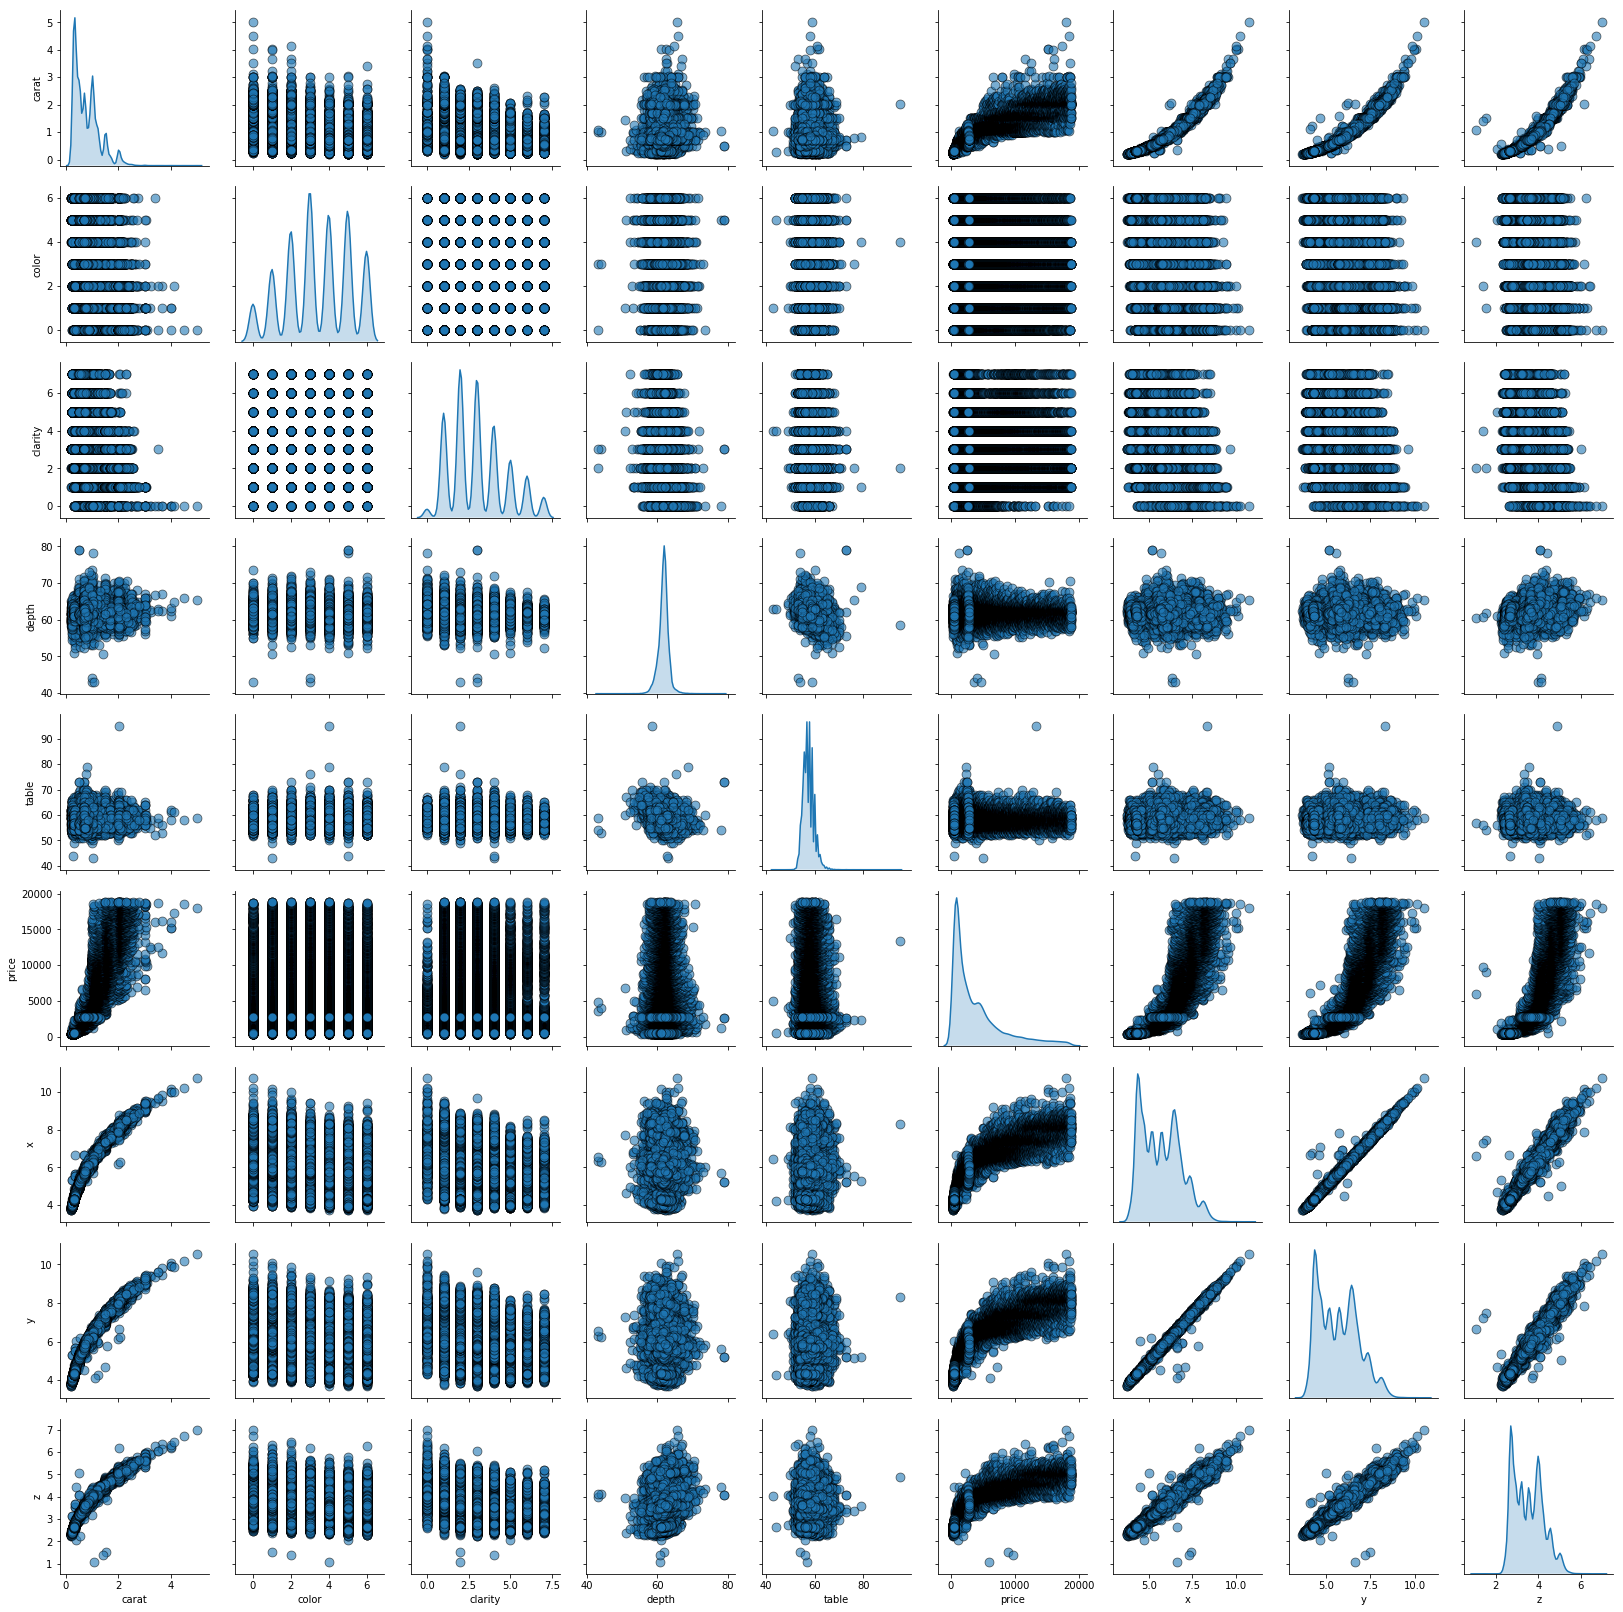

In [20]:
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

*Pairplot*: On the diagonal we have the histograms, showing us the distribution of each variable. The rest of the plots are scatter plots, and they show us the relationship, or lack of it, between two variables. Here we can see exactly what we were saying in the analysis of the features. The highly correlated variables (with price) are carat and x, y and z. 

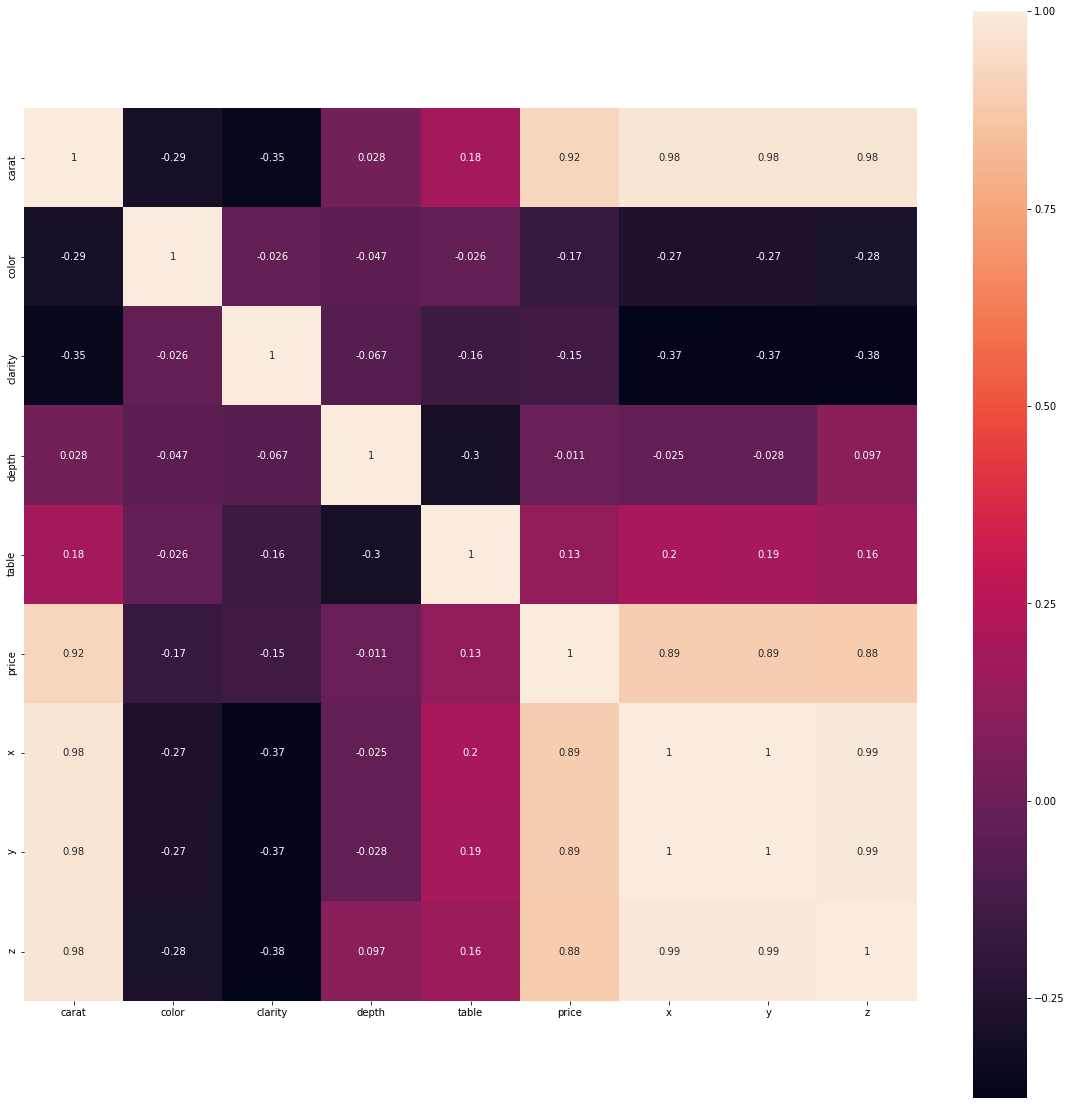

In [22]:
plt.figure(figsize=(20, 20))
p = sns.heatmap(diamonds.corr(), annot=True,square=True)

As we saw in the pairplot, the correlation coefficient with price is really high for carat, x, y and z and the rest of the features don't really have a linear correlation with price, so we can definitely say that the most important features to determine a diamond's price are the weight and dimensions of it.

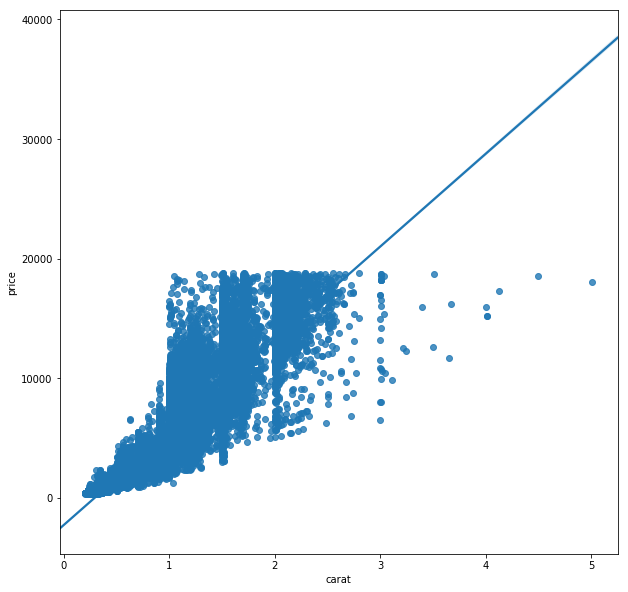

In [37]:
plt.figure(figsize=(10, 10))
j = sns.regplot(diamonds.carat, diamonds.price, scatter=True)


In [33]:
slope, intercept, r_value, p_value, std_err = stats.linregress(diamonds.carat, diamonds.price)

In [38]:
r2 = r_value ** 2

In [39]:
r2

0.8493547015161208

We can now say that the price is affected by the weight (carat), since 85% of the variation in price can be explained by the variation in carat.